# __Problem 1__

### batch steepest gradient method と Newton based method の実装

In [13]:
import numpy as np
import matplotlib.pyplot as plt

### Toy Dataset の生成

In [14]:
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n,2)
y = 2 * (omega * x[:,0] + x[:,1] + noise >0) - 1

### batch steepest gradient method の実装

In [15]:
class BSGM:
    """    
    method:
        update(grad):　w の更新
        d()         : 勾配の計算
        J()　　　   :　目的関数
        training()  :　学習
        
    """
    def __init__(self, x, y, alpha = 0.01, lamda = 0.01, loop = 50):
        self.x = x
        self.y = y
        self.col = self.x.shape[1]
        self.alpha = alpha
        self.lamda = lamda
        self.loop = loop

    def update(self,grad):                                   
        return self.w + self.alpha * grad
    
    def d(self):
        obj = np.zeros(self.col)
        for x_, y_ in zip(self.x,self.y):
            index = -y_ * self.w.dot(x_)
            obj += (1 - 1/(1 + np.e ** index)) * -y_ * x_
        obj += 2 * self.lamda * self.w
        
        return -obj
    
    def J(self):
        obj = 0
        for x_, y_ in zip(self.x, self.y):
            index = -y_ * self.w.dot(x_)
            obj += np.log(1 + np.e ** index)
        obj += self.lamda * self.w.dot(self.w)
        
        return obj
    
    def training(self):
        self.w = np.zeros(self.col)
        self.J_list = []
        for i in range(self.loop):
            self.J_list.append(self.J())
            grad = self.d()
            self.w = self.update(grad)
        
        return self.J_list, self.w

### Newton based method の実装

In [16]:
class NBM:
    """   
    method:
        batch steepest gradient method と同様
    """
    def __init__(self, x, y, alpha = 0.01, lamda = 0.01, loop = 50):
        self.x = x
        self.y = y
        self.col = self.x.shape[1]
        self.alpha = alpha
        self.lamda = lamda
        self.loop = loop
        
    def update(self,grad):
        return self.w + self.alpha * grad
    
    def d(self):
        dJ = np.zeros(self.col)
        ddJ = np.zeros((self.col,self.col))
        for x_, y_ in zip(self.x, self.y):
            index = -y_ * self.w.dot(x_)
            dJ += (1 - 1/(1 + np.e ** index)) * -y_ * x_
            x__ = x_[:,np.newaxis]
            ddJ += ((np.e ** index)/((1 + np.e ** index)**2)) * x__.dot(x__.T)
            
        dJ += 2 * self.lamda * self.w
        ddJ += 2 * self.lamda
        ddJ_inv = np.linalg.inv(ddJ)
        obj = ddJ_inv.dot(dJ)

        return -obj
    
    def J(self):
        obj = 0
        for x_, y_ in zip(self.x, self.y):
            index = -y_ * self.w.dot(x_)
            obj += np.log(1 + np.e ** index)
        obj += self.lamda * self.w.dot(self.w)
        
        return obj
    
    def training(self):
        self.w = np.zeros(self.col)
        self.J_list = []
        for i in range(self.loop):
            self.J_list.append(self.J())
            grad = self.d()
            self.w = self.update(grad)
        
        return self.J_list, self.w

### パラメータの決定 

In [17]:
alpha, lamda, loop = 0.01, 0.01, 50

### 実行 

In [18]:
clr = BSGM(x,y,alpha = alpha, lamda = lamda, loop = loop)
J_list_BSGM, w_BSGM = clr.training()

clr2 = NBM(x,y,alpha = alpha, lamda = lamda, loop = loop)
J_list_NBM, w_NBM = clr2.training()

### 目的関数の推移グラフの表示 

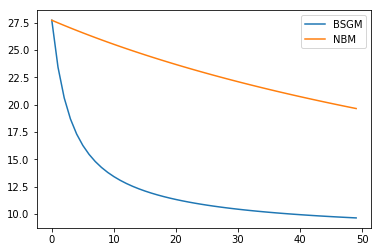

In [19]:
t = np.arange(loop)

p1 = plt.plot(t,J_list_BSGM)
p2 = plt.plot(t,J_list_NBM)
plt.legend((p1[0],p2[0]),("BSGM","NBM"))
plt.show()